# Basic Example with Iris

In [2]:
import numpy as np
from sklearn.datasets import load_iris 
iris = load_iris() 
X = iris.data.astype(np.float32) 
y_true = iris.target.astype(np.int32)

In [3]:
from sklearn.preprocessing import OneHotEncoder

y_onehot = OneHotEncoder().fit_transform(y_true.reshape(-1, 1))
y_onehot = y_onehot.astype(np.int64).todense()

In [4]:
y_onehot.dtype

dtype('int64')

In [5]:
y_onehot[:5]

matrix([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, random_state=14)

In [7]:
input_layer_size, hidden_layer_size, output_layer_size = 4, 6, 3

In [8]:
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [9]:
hidden_layer = Dense(output_dim=hidden_layer_size, input_dim=input_layer_size, activation='relu')
output_layer = Dense(output_layer_size, activation='sigmoid')

In [10]:
#!pip install -U keras

In [11]:
model = Sequential(layers=[hidden_layer, output_layer])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train)

Epoch 1/10
112/112 [==============================] - 0s - loss: 0.3581 - acc: 0.2946     
Epoch 2/10
112/112 [==============================] - 0s - loss: 0.3459 - acc: 0.2946     
Epoch 3/10
112/112 [==============================] - 0s - loss: 0.3354 - acc: 0.2946     
Epoch 4/10
112/112 [==============================] - 0s - loss: 0.3270 - acc: 0.2946     
Epoch 5/10
112/112 [==============================] - 0s - loss: 0.3194 - acc: 0.2946     
Epoch 6/10
112/112 [==============================] - 0s - loss: 0.3143 - acc: 0.3125     
Epoch 7/10
112/112 [==============================] - 0s - loss: 0.3102 - acc: 0.3214     
Epoch 8/10
112/112 [==============================] - 0s - loss: 0.3075 - acc: 0.3304     
Epoch 9/10
112/112 [==============================] - 0s - loss: 0.3054 - acc: 0.3750     
Epoch 10/10
112/112 [==============================] - 0s - loss: 0.3038 - acc: 0.4286     


In [13]:
history.history

{'acc': [0.29464285714285715,
  0.29464285714285715,
  0.29464285714285715,
  0.29464285714285715,
  0.29464285714285715,
  0.3125,
  0.32142857142857145,
  0.33035714285714285,
  0.375,
  0.42857142857142855],
 'loss': [0.35810074635914396,
  0.34587488429886953,
  0.33540112631661551,
  0.32697001525333952,
  0.31936654022761751,
  0.31429054907390047,
  0.31015791211809429,
  0.30745121836662292,
  0.30539869410651072,
  0.30380106398037504]}

In [14]:
%matplotlib inline

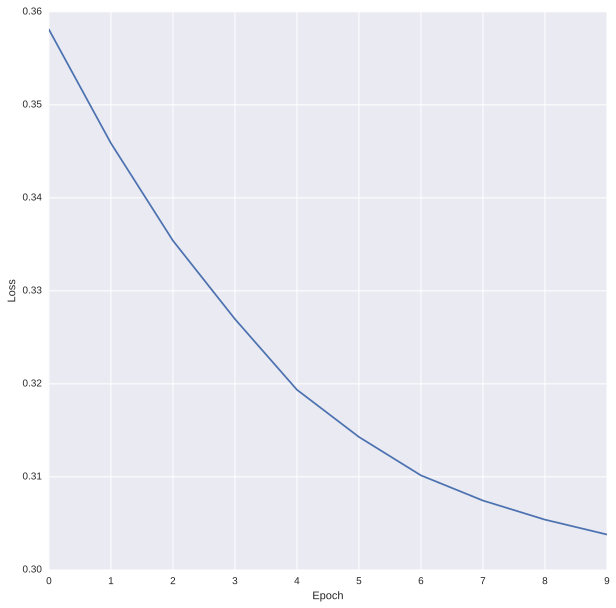

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("keras_on_iris_one.png")

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred = model.predict_classes(X_test)

32/38 [========================>.....] - ETA: 0s

In [31]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
from sklearn.metrics import classification_report
y_pred = model.predict_classes(X_test)
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        17
          1       0.00      0.00      0.00        13
          2       0.21      1.00      0.35         8

avg / total       0.04      0.21      0.07        38



/home/robert/Programs/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
hidden_layer = Dense(output_dim=hidden_layer_size, input_dim=input_layer_size, activation='relu')
output_layer = Dense(output_layer_size, activation='sigmoid')

model = Sequential(layers=[hidden_layer, output_layer])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, nb_epoch=1000, verbose=False)

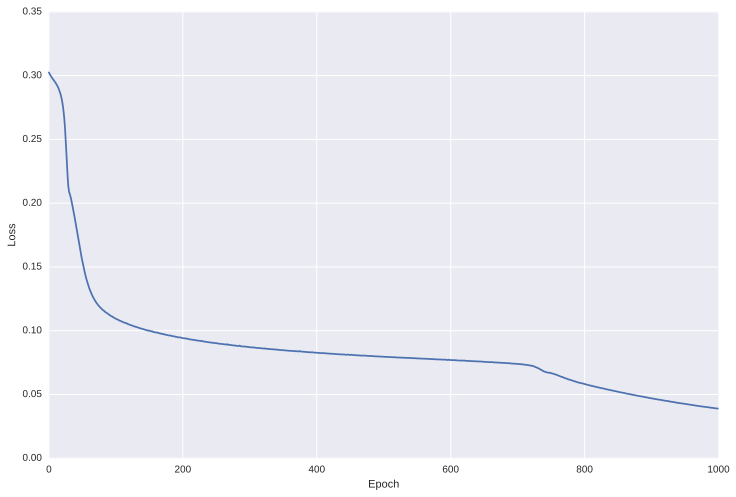

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("keras_on_iris_2.png")

In [38]:
y_pred = model.predict_classes(X_test)
print(classification_report(y_true=y_test.argmax(axis=1), y_pred=y_pred))

32/38 [========================>.....] - ETA: 0s             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         8

avg / total       1.00      1.00      1.00        38

